In [ ]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Model, Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from keras.models import load_model
from sklearn.decomposition import PCA

In [ ]:
# Function to perform onehot encoding of labels
def onehotEncodeLabels(trainY, testY):
  # integer encode
  label_encoder = LabelEncoder()
  int_trainY = label_encoder.fit_transform(trainY.reshape(-1))
  int_testY = label_encoder.transform(testY.reshape(-1))

  # binary encode
  onehot_encoder = OneHotEncoder(sparse=False)
  int_trainY = int_trainY.reshape(len(int_trainY), 1)
  int_testY = int_testY.reshape(len(int_testY), 1)

  trainYEncoded = onehot_encoder.fit_transform(int_trainY)
  testYEncoded = onehot_encoder.transform(int_testY)
  return trainYEncoded, testYEncoded

# Function for Standard Scaling the data
def scaleData(trainData, testData):
  # Scaling of data
  scaler = StandardScaler()
  Xtrain = scaler.fit_transform(trainData)
  Xtest = scaler.transform(testData)

  return Xtrain, Xtest

# Function for plotting accuracy and loss curve
def plotGraphs(history):
  # Plotting history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  # Plotting history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

# Function for MLP Model (ANN)
def statNeuralNetwork(Xtrain, Ytrain, Xtest, Ytest, h1, h2, h3, h4, h5, epochs):
  # Build MLP
  model = Sequential()
  model.add(Dense(h1, input_dim=Xtrain.shape[1], activation='relu'))
  model.add(Dense(h2, activation='relu'))
  model.add(Dense(h3, activation='relu'))
  model.add(Dense(h4, activation='relu'))
  model.add(Dense(h5, activation='relu'))
  # Output Layer
  model.add(Dense(264, activation='softmax'))

  # Model compiled using SGD Optimizer
  model.compile(loss='categorical_crossentropy', optimizer = SGD(learning_rate=0.01, decay=0.0001, momentum=0.9), metrics = ['accuracy'])
  
  # Model Training
  history = model.fit(Xtrain, Ytrain, epochs = epochs, batch_size = 64, validation_data = (Xtest, Ytest), shuffle=True)

  # Plotting accuracy and loss curve
  plotGraphs(history)

  # return model
  return model

In [ ]:
# Loading CSV file of Statistical feature with classlabels
statFeatures = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Final_OverlapData_StatFeatures_Nocall_Labels.csv")

# Removing data which contains No-call classlabels
statData = statFeatures.drop(statFeatures.index[statFeatures['VGGCustStat'] == 'Nocall'])

# Considering only ZeroCrossingsRate to MFCC19 columns as statistical features
statData1 = statData.loc[:, 'ZeroCrossingsRate':'MFCC19']
Stat_labels = statData.loc[:, 'VGGCustStat']

# Converting series data into numpy array
statFeatures = np.asarray(statData1[:325952])
statLabels = np.asarray(Stat_labels[:325952])

print("Statistical Data Shape after Nocall Removal = {}".format(statFeatures.shape))

del statData, statData1, Stat_labels

Statistical Data Shape after Nocall Removal = (325952, 25)


**Stratified K-Fold Cross Validation - Overlap Dataset**

In [ ]:
# Initialize StratifiedKFold using 5-fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Splitting and Saving data and labels of each fold into 5 separate files
i = 0
for trainId, testId in kfold.split(statFeatures, statLabels):

  trainStatData, testStatData = statFeatures[trainId], statFeatures[testId]
  trainStatLabels, testStatLabels = statLabels[trainId], statLabels[testId]
  trainStatLabels, testStatLabels = onehotEncodeLabels(trainStatLabels, testStatLabels)
  
  np.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainFeatures_128_" + str(i) + ".npy", trainStatData)
  np.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainLabels_128_" + str(i) + ".npy", trainStatLabels)
  np.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testFeatures_128_" + str(i) + ".npy", testStatData)
  np.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testLabels_128_" + str(i) + ".npy", testStatLabels)
  
  i += 1

================================== K Fold : 0 ==================================

Shape of Statistical Features after splitting:
Training Data Shape   = (260761, 25)
Training Labels Shape = (260761, 264)
Testing Data Shape   = (65191, 25)
Testing Labels Shape = (65191, 264)

Epoch 1/30
4075/4075 [==============================] - 99s 23ms/step - loss: 4.3989 - accuracy: 0.1190 - val_loss: 3.8528 - val_accuracy: 0.1980
Epoch 2/30
4075/4075 [==============================] - 97s 24ms/step - loss: 3.5250 - accuracy: 0.2534 - val_loss: 3.2870 - val_accuracy: 0.3007
Epoch 3/30
4075/4075 [==============================] - 92s 23ms/step - loss: 3.0143 - accuracy: 0.3465 - val_loss: 2.9126 - val_accuracy: 0.3695
Epoch 4/30
4075/4075 [==============================] - 96s 24ms/step - loss: 2.6408 - accuracy: 0.4181 - val_loss: 2.6439 - val_accuracy: 0.4248
Epoch 5/30
4075/4075 [==============================] - 96s 24ms/step - loss: 2.3454 - accuracy: 0.4746 - val_loss: 2.4423 - val_accuracy: 0

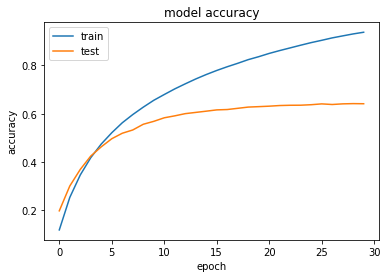

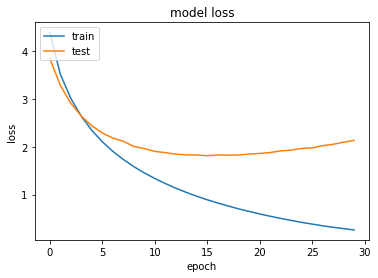

2038/2038 [==============================] - 15s 7ms/step - loss: 2.1352 - accuracy: 0.6412

Training Accuracy = 95.24200558662415%
Testing Accuracy = 64.1238808631897%



In [ ]:
i = 0
print("================================== K Fold :",i,"==================================")

# Loading statistical features and labels of Fold-0
trainStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainFeatures_128_" + str(i) + ".npy")
trainStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainLabels_128_" + str(i) + ".npy")
testStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testFeatures_128_" + str(i) + ".npy")
testStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testLabels_128_" + str(i) + ".npy")

print("\nShape of Statistical Features after splitting:")
print("Training Data Shape   = {}".format(trainStatData.shape))
print("Training Labels Shape = {}".format(trainStatLabels.shape))
print("Testing Data Shape   = {}".format(testStatData.shape))
print("Testing Labels Shape = {}\n".format(testStatLabels.shape))

# Scaling the data of Fold-0
trainDataStat, testDataStat = scaleData(trainStatData, testStatData)
del trainStatData, testStatData

# Model Training for Fold-0
statModel = statNeuralNetwork(trainDataStat, trainStatLabels, testDataStat, testStatLabels, 4096, 4096, 2048, 1024, 512, 30)

# Saving Trained Model of Fold-0
statModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/StatData/statModel_Overlap_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-0
_, trainAccuracy = statModel.evaluate(trainDataStat, trainStatLabels)
del trainDataStat, trainStatLabels

_, testAccuracy = statModel.evaluate(testDataStat, testStatLabels)
del testDataStat, testStatLabels

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%\n".format(testAccuracy*100))

del statModel

================================== K Fold : 1 ==================================

Shape of Statistical Features after splitting:
Training Data Shape   = (260761, 25)
Training Labels Shape = (260761, 264)
Testing Data Shape   = (65191, 25)
Testing Labels Shape = (65191, 264)

Epoch 1/30
4075/4075 [==============================] - 103s 25ms/step - loss: 4.3857 - accuracy: 0.1207 - val_loss: 3.8303 - val_accuracy: 0.1978
Epoch 2/30
4075/4075 [==============================] - 94s 23ms/step - loss: 3.5106 - accuracy: 0.2557 - val_loss: 3.2759 - val_accuracy: 0.3011
Epoch 3/30
4075/4075 [==============================] - 96s 24ms/step - loss: 3.0052 - accuracy: 0.3474 - val_loss: 2.9237 - val_accuracy: 0.3664
Epoch 4/30
4075/4075 [==============================] - 93s 23ms/step - loss: 2.6368 - accuracy: 0.4165 - val_loss: 2.6540 - val_accuracy: 0.4223
Epoch 5/30
4075/4075 [==============================] - 93s 23ms/step - loss: 2.3482 - accuracy: 0.4735 - val_loss: 2.4551 - val_accuracy: 

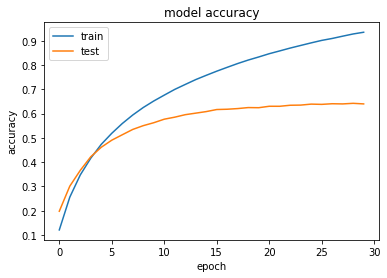

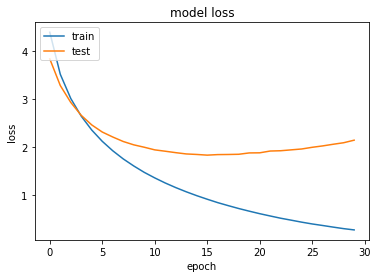

2038/2038 [==============================] - 15s 7ms/step - loss: 2.1378 - accuracy: 0.6402

Training Accuracy = 94.84700560569763%
Testing Accuracy = 64.02110457420349%



In [ ]:
i = 1
print("================================== K Fold :",i,"==================================")

# Loading statistical features and labels of Fold-1
trainStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainFeatures_128_" + str(i) + ".npy")
trainStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainLabels_128_" + str(i) + ".npy")
testStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testFeatures_128_" + str(i) + ".npy")
testStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testLabels_128_" + str(i) + ".npy")

print("\nShape of Statistical Features after splitting:")
print("Training Data Shape   = {}".format(trainStatData.shape))
print("Training Labels Shape = {}".format(trainStatLabels.shape))
print("Testing Data Shape   = {}".format(testStatData.shape))
print("Testing Labels Shape = {}\n".format(testStatLabels.shape))

# Scaling the data of Fold-1
trainDataStat, testDataStat = scaleData(trainStatData, testStatData)
del trainStatData, testStatData

# Model Training for Fold-1
statModel = statNeuralNetwork(trainDataStat, trainStatLabels, testDataStat, testStatLabels, 4096, 4096, 2048, 1024, 512, 30)

# Saving Trained Model of Fold-1
statModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/StatData/statModel_Overlap_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-1
_, trainAccuracy = statModel.evaluate(trainDataStat, trainStatLabels)
del trainDataStat, trainStatLabels

_, testAccuracy = statModel.evaluate(testDataStat, testStatLabels)
del testDataStat, testStatLabels

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%\n".format(testAccuracy*100))

del statModel

================================== K Fold : 2 ==================================

Shape of Statistical Features after splitting:
Training Data Shape   = (260762, 25)
Training Labels Shape = (260762, 264)
Testing Data Shape   = (65190, 25)
Testing Labels Shape = (65190, 264)

Epoch 1/30
4075/4075 [==============================] - 85s 20ms/step - loss: 4.3799 - accuracy: 0.1226 - val_loss: 3.8578 - val_accuracy: 0.1993
Epoch 2/30
4075/4075 [==============================] - 76s 19ms/step - loss: 3.4907 - accuracy: 0.2597 - val_loss: 3.2779 - val_accuracy: 0.2988
Epoch 3/30
4075/4075 [==============================] - 74s 18ms/step - loss: 2.9806 - accuracy: 0.3522 - val_loss: 2.9082 - val_accuracy: 0.3711
Epoch 4/30
4075/4075 [==============================] - 79s 19ms/step - loss: 2.6066 - accuracy: 0.4238 - val_loss: 2.6431 - val_accuracy: 0.4239
Epoch 5/30
4075/4075 [==============================] - 79s 19ms/step - loss: 2.3146 - accuracy: 0.4798 - val_loss: 2.4632 - val_accuracy: 0

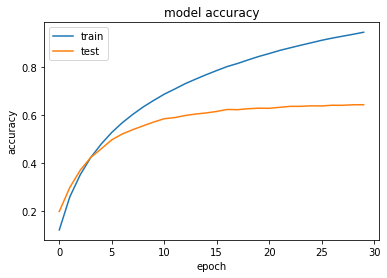

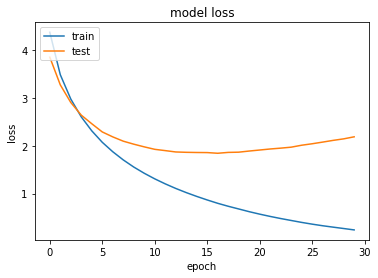

2038/2038 [==============================] - 16s 8ms/step - loss: 2.1894 - accuracy: 0.6428

Training Accuracy = 95.755136013031%
Testing Accuracy = 64.2828643321991%



In [ ]:
i = 2
print("================================== K Fold :",i,"==================================")

# Loading statistical features and labels of Fold-2
trainStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainFeatures_128_" + str(i) + ".npy")
trainStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainLabels_128_" + str(i) + ".npy")
testStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testFeatures_128_" + str(i) + ".npy")
testStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testLabels_128_" + str(i) + ".npy")

print("\nShape of Statistical Features after splitting:")
print("Training Data Shape   = {}".format(trainStatData.shape))
print("Training Labels Shape = {}".format(trainStatLabels.shape))
print("Testing Data Shape   = {}".format(testStatData.shape))
print("Testing Labels Shape = {}\n".format(testStatLabels.shape))

# Scaling the data of Fold-2
trainDataStat, testDataStat = scaleData(trainStatData, testStatData)
del trainStatData, testStatData

# Model Training for Fold-2
statModel = statNeuralNetwork(trainDataStat, trainStatLabels, testDataStat, testStatLabels, 4096, 4096, 2048, 1024, 512, 30)

# Saving Trained Model of Fold-2
statModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/StatData/statModel_Overlap_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-2
_, trainAccuracy = statModel.evaluate(trainDataStat, trainStatLabels)
del trainDataStat, trainStatLabels

_, testAccuracy = statModel.evaluate(testDataStat, testStatLabels)
del testDataStat, testStatLabels

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%\n".format(testAccuracy*100))

del statModel

================================== K Fold : 3 ==================================

Shape of Statistical Features after splitting:
Training Data Shape   = (260762, 25)
Training Labels Shape = (260762, 264)
Testing Data Shape   = (65190, 25)
Testing Labels Shape = (65190, 264)

Epoch 1/30
4075/4075 [==============================] - 85s 21ms/step - loss: 4.3890 - accuracy: 0.1198 - val_loss: 3.8561 - val_accuracy: 0.1947
Epoch 2/30
4075/4075 [==============================] - 82s 20ms/step - loss: 3.5108 - accuracy: 0.2565 - val_loss: 3.2623 - val_accuracy: 0.3020
Epoch 3/30
4075/4075 [==============================] - 76s 19ms/step - loss: 2.9912 - accuracy: 0.3506 - val_loss: 2.8935 - val_accuracy: 0.3728
Epoch 4/30
4075/4075 [==============================] - 81s 20ms/step - loss: 2.6154 - accuracy: 0.4214 - val_loss: 2.6374 - val_accuracy: 0.4229
Epoch 5/30
4075/4075 [==============================] - 81s 20ms/step - loss: 2.3224 - accuracy: 0.4797 - val_loss: 2.4222 - val_accuracy: 0

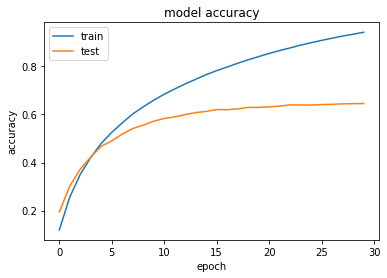

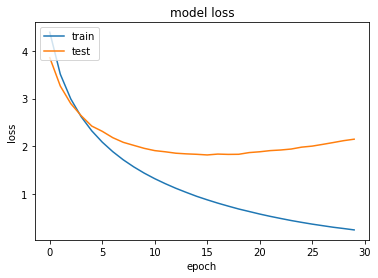

2038/2038 [==============================] - 15s 8ms/step - loss: 2.1476 - accuracy: 0.6450

Training Accuracy = 95.65887451171875%
Testing Accuracy = 64.49761986732483%



In [ ]:
i = 3
print("================================== K Fold :",i,"==================================")

# Loading statistical features and labels of Fold-3
trainStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainFeatures_128_" + str(i) + ".npy")
trainStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainLabels_128_" + str(i) + ".npy")
testStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testFeatures_128_" + str(i) + ".npy")
testStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testLabels_128_" + str(i) + ".npy")

print("\nShape of Statistical Features after splitting:")
print("Training Data Shape   = {}".format(trainStatData.shape))
print("Training Labels Shape = {}".format(trainStatLabels.shape))
print("Testing Data Shape   = {}".format(testStatData.shape))
print("Testing Labels Shape = {}\n".format(testStatLabels.shape))

# Scaling the data of Fold-3
trainDataStat, testDataStat = scaleData(trainStatData, testStatData)
del trainStatData, testStatData

# Model Training for Fold-3
statModel = statNeuralNetwork(trainDataStat, trainStatLabels, testDataStat, testStatLabels, 4096, 4096, 2048, 1024, 512, 30)

# Saving Trained Model of Fold-3
statModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/StatData/statModel_Overlap_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-3
_, trainAccuracy = statModel.evaluate(trainDataStat, trainStatLabels)
del trainDataStat, trainStatLabels

_, testAccuracy = statModel.evaluate(testDataStat, testStatLabels)
del testDataStat, testStatLabels

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%\n".format(testAccuracy*100))

del statModel

================================== K Fold : 4 ==================================

Shape of Statistical Features after splitting:
Training Data Shape   = (260762, 25)
Training Labels Shape = (260762, 264)
Testing Data Shape   = (65190, 25)
Testing Labels Shape = (65190, 264)

Epoch 1/30
4075/4075 [==============================] - 81s 19ms/step - loss: 4.3980 - accuracy: 0.1186 - val_loss: 3.8560 - val_accuracy: 0.1957
Epoch 2/30
4075/4075 [==============================] - 78s 19ms/step - loss: 3.5202 - accuracy: 0.2548 - val_loss: 3.2651 - val_accuracy: 0.3036
Epoch 3/30
4075/4075 [==============================] - 77s 19ms/step - loss: 3.0086 - accuracy: 0.3470 - val_loss: 2.9050 - val_accuracy: 0.3736
Epoch 4/30
4075/4075 [==============================] - 76s 19ms/step - loss: 2.6379 - accuracy: 0.4176 - val_loss: 2.6412 - val_accuracy: 0.4253
Epoch 5/30
4075/4075 [==============================] - 76s 19ms/step - loss: 2.3512 - accuracy: 0.4728 - val_loss: 2.4922 - val_accuracy: 0

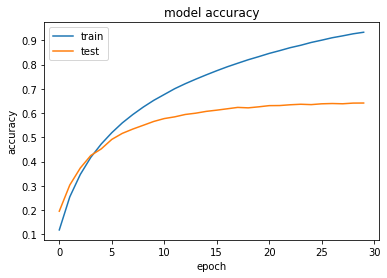

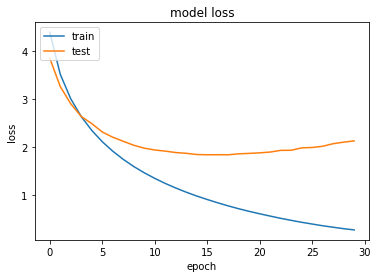

2038/2038 [==============================] - 15s 8ms/step - loss: 2.1330 - accuracy: 0.6415

Training Accuracy = 94.72123980522156%
Testing Accuracy = 64.15401101112366%



In [ ]:
i = 4
print("================================== K Fold :",i,"==================================")

# Loading statistical features and labels of Fold-4
trainStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainFeatures_128_" + str(i) + ".npy")
trainStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainLabels_128_" + str(i) + ".npy")
testStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testFeatures_128_" + str(i) + ".npy")
testStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testLabels_128_" + str(i) + ".npy")

print("\nShape of Statistical Features after splitting:")
print("Training Data Shape   = {}".format(trainStatData.shape))
print("Training Labels Shape = {}".format(trainStatLabels.shape))
print("Testing Data Shape   = {}".format(testStatData.shape))
print("Testing Labels Shape = {}\n".format(testStatLabels.shape))

# Scaling the data of Fold-4
trainDataStat, testDataStat = scaleData(trainStatData, testStatData)
del trainStatData, testStatData

# Model Training for Fold-4
statModel = statNeuralNetwork(trainDataStat, trainStatLabels, testDataStat, testStatLabels, 4096, 4096, 2048, 1024, 512, 30)

# Saving Trained Model of Fold-4
statModel.save("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/StatData/statModel_Overlap_" + str(i) + ".h5")

# Calculating Training and Testing Accuracy for Fold-4
_, trainAccuracy = statModel.evaluate(trainDataStat, trainStatLabels)
del trainDataStat, trainStatLabels

_, testAccuracy = statModel.evaluate(testDataStat, testStatLabels)
del testDataStat, testStatLabels

print("\nTraining Accuracy = {}%".format(trainAccuracy*100))
print("Testing Accuracy = {}%\n".format(testAccuracy*100))

del statModel

**Classification Reports for each fold**

In [ ]:
i = 0
print("================================== K Fold :",i,"==================================")

# Loading statistical features and labels of Fold-0
trainStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainFeatures_128_" + str(i) + ".npy")
trainStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainLabels_128_" + str(i) + ".npy")
testStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testFeatures_128_" + str(i) + ".npy")
testStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testLabels_128_" + str(i) + ".npy")

# Scaling the data of Fold-0
trainDataStat, testDataStat = scaleData(trainStatData, testStatData)
del trainStatData, testStatData

# Loading Model of Fold-0
statModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/StatData/statModel_Overlap_" + str(i) + ".h5")

# Predicting Test labels for Fold-0
predictedTestLabels = statModel.predict(testDataStat)

# Printing Classification Report for Fold-0
print("\nClassification Report: ")
print(classification_report(testStatLabels, np.round(predictedTestLabels)))

del trainStatLabels, testStatLabels, predictedTestLabels

================================== K Fold : 0 ==================================

Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       402
           1       0.75      0.59      0.66        76
           2       0.72      0.65      0.69       171
           3       0.76      0.70      0.73       352
           4       0.77      0.68      0.72       370
           5       0.66      0.61      0.63       122
           6       0.48      0.45      0.47       135
           7       0.84      0.67      0.75       399
           8       0.77      0.78      0.78       437
           9       0.82      0.39      0.53        36
          10       0.83      0.77      0.80       294
          11       0.81      0.72      0.76       238
          12       0.75      0.57      0.65       203
          13       0.85      0.66      0.74       546
          14       0.46      0.31      0.37        71
          15       0.54      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
i = 1
print("================================== K Fold :",i,"==================================")

# Loading statistical features and labels of Fold-1
trainStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainFeatures_128_" + str(i) + ".npy")
trainStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainLabels_128_" + str(i) + ".npy")
testStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testFeatures_128_" + str(i) + ".npy")
testStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testLabels_128_" + str(i) + ".npy")

# Scaling the data of Fold-1
trainDataStat, testDataStat = scaleData(trainStatData, testStatData)
del trainStatData, testStatData

# Loading Model of Fold-1
statModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/StatData/statModel_Overlap_" + str(i) + ".h5")

# Predicting Test labels for Fold-1
predictedTestLabels = statModel.predict(testDataStat)

# Printing Classification Report for Fold-1
print("\nClassification Report: ")
print(classification_report(testStatLabels, np.round(predictedTestLabels)))

del trainStatLabels, testStatLabels, predictedTestLabels

================================== K Fold : 1 ==================================

Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.57      0.65       402
           1       0.71      0.53      0.61        75
           2       0.79      0.59      0.67       172
           3       0.80      0.67      0.73       352
           4       0.77      0.63      0.69       370
           5       0.66      0.55      0.60       122
           6       0.76      0.47      0.58       135
           7       0.78      0.74      0.76       399
           8       0.85      0.71      0.77       437
           9       0.67      0.44      0.53        36
          10       0.87      0.80      0.83       294
          11       0.84      0.72      0.77       237
          12       0.77      0.64      0.70       204
          13       0.75      0.73      0.74       545
          14       0.60      0.36      0.45        72
          15       0.70      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
i = 2
print("================================== K Fold :",i,"==================================")

# Loading statistical features and labels of Fold-2
trainStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainFeatures_128_" + str(i) + ".npy")
trainStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainLabels_128_" + str(i) + ".npy")
testStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testFeatures_128_" + str(i) + ".npy")
testStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testLabels_128_" + str(i) + ".npy")

# Scaling the data of Fold-2
trainDataStat, testDataStat = scaleData(trainStatData, testStatData)
del trainStatData, testStatData

# Loading Model of Fold-2
statModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/StatData/statModel_Overlap_" + str(i) + ".h5")

# Predicting Test labels for Fold-2
predictedTestLabels = statModel.predict(testDataStat)

# Printing Classification Report for Fold-2
print("\nClassification Report: ")
print(classification_report(testStatLabels, np.round(predictedTestLabels)))

del trainStatLabels, testStatLabels, predictedTestLabels

================================== K Fold : 2 ==================================

Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       402
           1       0.68      0.57      0.62        75
           2       0.76      0.70      0.73       172
           3       0.77      0.78      0.77       352
           4       0.69      0.69      0.69       370
           5       0.71      0.54      0.61       122
           6       0.67      0.44      0.53       135
           7       0.76      0.70      0.73       399
           8       0.82      0.75      0.78       436
           9       0.55      0.30      0.39        37
          10       0.84      0.80      0.82       294
          11       0.84      0.71      0.77       237
          12       0.74      0.62      0.67       204
          13       0.76      0.72      0.74       545
          14       0.54      0.39      0.45        72
          15       0.47      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
i = 3
print("================================== K Fold :",i,"==================================")

# Loading statistical features and labels of Fold-3
trainStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainFeatures_128_" + str(i) + ".npy")
trainStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainLabels_128_" + str(i) + ".npy")
testStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testFeatures_128_" + str(i) + ".npy")
testStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testLabels_128_" + str(i) + ".npy")

# Scaling the data of Fold-3
trainDataStat, testDataStat = scaleData(trainStatData, testStatData)
del trainStatData, testStatData

# Loading Model of Fold-3
statModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/StatData/statModel_Overlap_" + str(i) + ".h5")

# Predicting Test labels for Fold-3
predictedTestLabels = statModel.predict(testDataStat)

# Printing Classification Report for Fold-3
print("\nClassification Report: ")
print(classification_report(testStatLabels, np.round(predictedTestLabels)))

del trainStatLabels, testStatLabels, predictedTestLabels

================================== K Fold : 3 ==================================

Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       402
           1       0.60      0.60      0.60        75
           2       0.72      0.65      0.68       172
           3       0.75      0.75      0.75       352
           4       0.73      0.60      0.66       370
           5       0.62      0.59      0.61       122
           6       0.62      0.41      0.49       134
           7       0.79      0.67      0.72       400
           8       0.85      0.74      0.79       436
           9       0.64      0.49      0.55        37
          10       0.82      0.80      0.81       294
          11       0.79      0.77      0.78       237
          12       0.68      0.62      0.65       204
          13       0.80      0.69      0.74       545
          14       0.51      0.53      0.52        72
          15       0.59      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
i = 4
print("================================== K Fold :",i,"==================================")

# Loading statistical features and labels of Fold-4
trainStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainFeatures_128_" + str(i) + ".npy")
trainStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/trainLabels_128_" + str(i) + ".npy")
testStatData = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testFeatures_128_" + str(i) + ".npy")
testStatLabels = np.load("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/Visual Features_abs_Overlap_RGB/Batch Data 64/Deep Features_CV/StatData/testLabels_128_" + str(i) + ".npy")

# Scaling the data of Fold-4
trainDataStat, testDataStat = scaleData(trainStatData, testStatData)
del trainStatData, testStatData

# Loading Model of Fold-4
statModel = load_model("/content/drive/MyDrive/Colab Notebooks/Fall 2021/Final Project/DCNN Models/CBC DCNN_CV/StatData/statModel_Overlap_" + str(i) + ".h5")

# Predicting Test labels for Fold-4
predictedTestLabels = statModel.predict(testDataStat)

# Printing Classification Report for Fold-4
print("\nClassification Report: ")
print(classification_report(testStatLabels, np.round(predictedTestLabels)))

del trainStatLabels, testStatLabels, predictedTestLabels

================================== K Fold : 4 ==================================

Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       401
           1       0.74      0.57      0.64        76
           2       0.75      0.67      0.71       172
           3       0.80      0.73      0.76       352
           4       0.65      0.69      0.67       369
           5       0.66      0.55      0.60       122
           6       0.65      0.57      0.61       135
           7       0.80      0.74      0.77       399
           8       0.76      0.80      0.78       437
           9       0.57      0.56      0.56        36
          10       0.81      0.77      0.79       294
          11       0.79      0.68      0.73       238
          12       0.76      0.54      0.63       204
          13       0.79      0.72      0.75       545
          14       0.58      0.31      0.40        72
          15       0.49      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
